In [11]:
import cv2 as cv
import numpy as np 
import pandas as pd 
import os
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern

#loading the dataset
img = cv.imread(r'PlantVillage\Pepper_bell\Pepper__bell___Bacterial_spot\0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG')

if img is None:
    print("Error: Image not found or unable to load.")
else:
    
    cv.imshow('Image', img)

   
    while True:
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    cv.destroyAllWindows()

# HOG AND COLOR HISTOGRAM

In [19]:
# HOG + color Histogram


# dataset_path = 'D:\AMRITA\SEMESTER 5\CV-Course\Plant_Leaf_Disease_Detection\PlantVillage' # Make sure this is correct
# image_paths = []
# labels_list = []

# for class_name in os.listdir(dataset_path):
#     class_path = os.path.join(dataset_path, class_name)
#     if os.path.isdir(class_path):
#         for image_name in os.listdir(class_path):
#             image_paths.append(os.path.join(class_path, image_name))
#             labels_list.append(class_name)

# # --- Step 2: Loop, Process One Image, and Extract Features ---
# features_list = []
# # Use tqdm to wrap the list for a nice progress bar
# for image_path in tqdm(image_paths, desc="Extracting Features"):
#     # Load ONE image
#     image = cv.imread(image_path)
#     if image is None:
#         print(f"Warning: Could not read image at {image_path}. Skipping.")
#         continue
#     image = cv.cvtColor(image, cv.COLOR_BGR2RGB) # Convert to RGB
    
#     # Resize the image
#     image = cv.resize(image, (128, 128)) # Using 128x128
    
#     # Normalize (using the memory-efficient astype)
#     image = image.astype('float32') / 255.0
    
#     # ---- Feature Extraction from the single image ----
#     # 1. HOG Features
#     gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
#     hog_features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
#                        cells_per_block=(2, 2), block_norm='L2-Hys')

#     # 2. Color Features (Hue Histogram)
#     hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
#     hue_hist = cv.calcHist([hsv_image], [0], None, [50], [0, 180])
#     cv.normalize(hue_hist, hue_hist)
#     hue_hist = hue_hist.flatten()
    
#     # 3. Concatenate and append
#     final_features = np.hstack([hog_features, hue_hist])
#     features_list.append(final_features)

# # --- Step 3: Final Conversion ---
# # Now, convert the list of small feature vectors into your final arrays
# X_features = np.array(features_list)
# encoder = LabelEncoder()
# y_data = encoder.fit_transform(labels_list)

# # Check your final, memory-friendly results
# print(f"\nShape of final feature matrix: {X_features.shape}")
# print(f"Shape of labels array: {y_data.shape}")

Extracting Features: 100%|███████████████████████████████████████████████████████| 20638/20638 [05:42<00:00, 60.30it/s]



Shape of final feature matrix: (20638, 8150)
Shape of labels array: (20638,)


# GLCM ALONE

In [2]:
# #GLCM
# dataset_path = 'D:\AMRITA\SEMESTER 5\CV-Course\Plant_Leaf_Disease_Detection\PlantVillage' # Make sure this is correct
# image_paths = []
# labels_list = []

# for class_name in os.listdir(dataset_path):
#     class_path = os.path.join(dataset_path, class_name)
#     if os.path.isdir(class_path):
#         for image_name in os.listdir(class_path):
#             image_paths.append(os.path.join(class_path, image_name))
#             labels_list.append(class_name)

# # --- GLCM Feature Extraction ---
# glcm_features_list = []

# # Loop through all image paths
# for image_path in tqdm(image_paths, desc="Extracting GLCM Features"):
#     image = cv.imread(image_path)
    
#     if image is None:
#         continue
        
#     # Resize and convert to grayscale
#     image_resized = cv.resize(image, (128, 128))
#     gray_image = cv.cvtColor(image_resized, cv.COLOR_BGR2GRAY)
    
#     # Compute GLCM
#     # GLCM is computed on integer images, so we use the grayscale image directly
#     glcm = graycomatrix(gray_image, distances=[5], angles=[0], levels=256,
#                         symmetric=True, normed=True)
    
#     # Extract statistical properties from the GLCM
#     contrast = graycoprops(glcm, 'contrast')
#     dissimilarity = graycoprops(glcm, 'dissimilarity')
#     homogeneity = graycoprops(glcm, 'homogeneity')
#     energy = graycoprops(glcm, 'energy')
#     correlation = graycoprops(glcm, 'correlation')
#     ASM = graycoprops(glcm, 'ASM')
    
#     # Stack the properties to form a single feature vector
#     glcm_props = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation, ASM])
    
#     glcm_features_list.append(glcm_props.flatten())

# # Convert to the final feature matrix
# X_features_glcm = np.array(glcm_features_list)

# encoder = LabelEncoder()
# y_data = encoder.fit_transform(labels_list)

# print(f"\nShape of GLCM feature matrix: {X_features_glcm.shape}")
# print(f"Shape of labels array: {y_data.shape}")

Extracting GLCM Features: 100%|██████████████████████████████████████████████████| 20638/20638 [03:37<00:00, 94.94it/s]


Shape of GLCM feature matrix: (20638, 6)
Shape of labels array: (20638,)


# HOG + COLOR HISTOGRAM + GLCM + LBP

In [12]:
# HOG + COLOR HISTOGRAM + GLCM + LBP
dataset_path = 'D:\AMRITA\SEMESTER 5\CV-Course\Plant_Leaf_Disease_Detection\PlantVillage' # Make sure this is correct
image_paths = []
labels_list = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, image_name))
            labels_list.append(class_name)

combined_features_list = []
P = 24
R = 8

for image_path in tqdm(image_paths, desc="Extracting Combined Features"):
    image = cv.imread(image_path)
    if image is None:
        continue
        
    image_resized = cv.resize(image, (128, 128))
    
    # 1. HOG Features
    gray_image = cv.cvtColor(image_resized, cv.COLOR_BGR2GRAY)
    hog_features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys')
    
    # 2. Color Histogram
    hsv_image = cv.cvtColor(image_resized, cv.COLOR_BGR2HSV)
    hue_hist = cv.calcHist([hsv_image], [0], None, [50], [0, 180]).flatten()
    hue_hist = hue_hist / (hue_hist.sum() + 1e-6)

    # 3. LBP Histogram
    lbp = local_binary_pattern(gray_image, P, R, method="uniform")
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    lbp_hist = lbp_hist.astype("float") / (lbp_hist.sum() + 1e-6)

    # 4. GLCM Properties
    glcm = graycomatrix(gray_image, [5], [0], 256, symmetric=True, normed=True)
    glcm_props = np.hstack([graycoprops(glcm, prop).flatten() for prop in 
                             ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']])

    # 5. Concatenate all features
    final_features = np.hstack([hog_features, hue_hist,lbp_hist, glcm_props])
    combined_features_list.append(final_features)

# Convert to the final feature matrix
X_features_combined = np.array(combined_features_list)

encoder = LabelEncoder()
y_data = encoder.fit_transform(labels_list)

print(f"\nShape of Combined feature matrix: {X_features_combined.shape}")
print(f"Shape of labels array: {y_data.shape}")

Extracting Combined Features: 100%|██████████████████████████████████████████████| 20638/20638 [11:06<00:00, 30.96it/s]



Shape of Combined feature matrix: (20638, 8181)
Shape of labels array: (20638,)


In [13]:
#train and test data split

X_train, X_test, y_train, y_test = train_test_split(
    X_features_combined, 
    y_data, 
    test_size=0.2, 
    random_state=42, # for reproducibility
    stratify=y_data
)

# Check the shapes of the new arrays
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape:  {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape:  {y_test.shape}")

Training data shape: (16510, 8181)
Testing data shape:  (4128, 8181)
Training labels shape: (16510,)
Testing labels shape:  (4128,)


In [14]:
#model training
model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    n_jobs=-1 
)

# Train the model on the training data
# This step might take a few minutes depending on your computer's speed
print("Training the Random Forest model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the Random Forest model...
Model training complete!


Making predictions on the test set...

Model Accuracy: 78.39%

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.89      0.44      0.59       199
                     Pepper__bell___healthy       0.80      0.90      0.85       296
                      Potato___Early_blight       0.81      0.88      0.84       200
                       Potato___Late_blight       0.74      0.58      0.65       200
                           Potato___healthy       0.00      0.00      0.00        30
                      Tomato_Bacterial_spot       0.80      0.87      0.84       426
                        Tomato_Early_blight       0.78      0.39      0.52       200
                         Tomato_Late_blight       0.72      0.82      0.76       382
                           Tomato_Leaf_Mold       0.90      0.73      0.81       190
                  Tomato_Septoria_leaf_spot       0.72      0.7

C:\Users\ANUSANTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ANUSANTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ANUSANTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

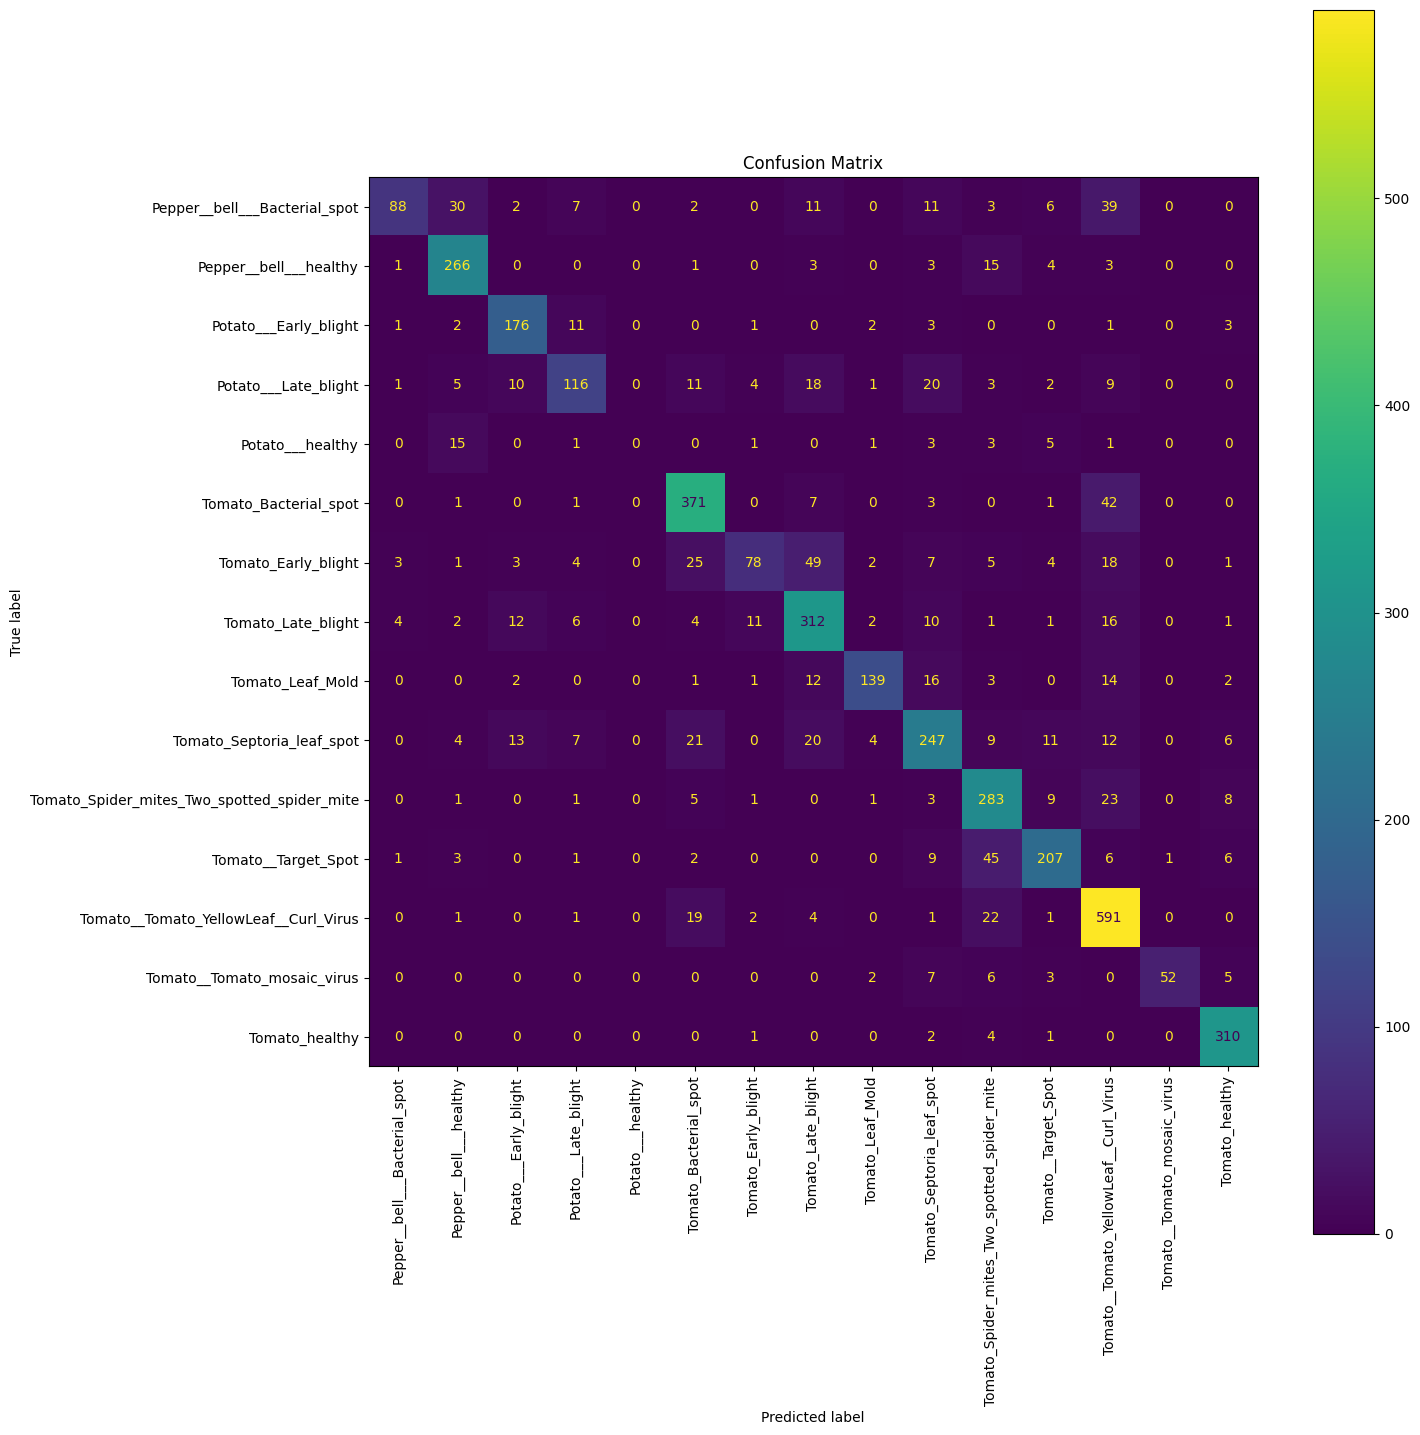

In [15]:
# Make predictions on the test data
print("Making predictions on the test set...")
y_pred = model.predict(X_test)

# 1. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# 2. View the Classification Report
# This is more detailed than accuracy and shows performance for each class.
# We use encoder.classes_ to get the original string names for the labels.
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# 3. Visualize the Confusion Matrix
# This helps see where the model is getting confused.
print("\nGenerating Confusion Matrix...")
fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred, 
    ax=ax, 
    xticks_rotation='vertical',
    display_labels=encoder.classes_
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()